In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

 Como el paquete 'pygal' no esta incluido en Anaconda, debo instalarlo para poder utilizarlo
 En el repositorio se encuentra el archivo 'pygal-2.4.0-py2.py3-none-any.whl' necesario para la instalación 

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [4]:
df1 = pd.read_excel ('09_07_2021_Barcelona_players.xlsx')
df2 = pd.read_excel ('09_07_2021_Deportivo de La Coruna_players.xlsx')
df3 = pd.read_excel ('09_07_2021_Levante_players.xlsx')
df4 = pd.read_excel ('09_07_2021_Real Betis_players.xlsx')
df5 = pd.read_excel ('09_07_2021_Real Madrid Femenino_players.xlsx')
df6 = pd.read_excel ('09_07_2021_Real Sociedad Womens_players.xlsx')
df7 = pd.read_excel ('09_07_2021_Valencia_players.xlsx')
df8 = pd.read_excel ('09_07_2021_Atletico Madrid_players.xlsx')
df9 = pd.read_excel ('09_07_2021_Eibar_players.xlsx')
df10 = pd.read_excel ('09_07_2021_Espanyol_players.xlsx')
df11 = pd.read_excel ('09_07_2021_Granadilla Tenerife_players.xlsx')
df12 = pd.read_excel ('09_07_2021_Logrono_players.xlsx')
df13 = pd.read_excel ('09_07_2021_Madrid CFF_players.xlsx')
df14 = pd.read_excel ('09_07_2021_Rayo Vallecano_players.xlsx')
df15 = pd.read_excel ('09_07_2021_Santa Teresa_players.xlsx')
df16 = pd.read_excel ('09_07_2021_Sevilla_players.xlsx')
df17 = pd.read_excel ('09_07_2021_Sporting de Huelva_players.xlsx')
df18 = pd.read_excel ('09_07_2021_Athletic_players.xlsx')



In [5]:
df5.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,"Shots saved, %",Supersaves,...,Shots saved with unsuccessful bouncing,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)"
0,1,María Rodríguez,196,31,238,116,30,87,75%,23,...,5,Spain,Real Madrid Fem,Spain,21,173,66,Both,04.21,04.18
1,13,Yohana Gomez Camino,191,5,30,11,4,7,64%,1,...,-,Spain,-,-,27,168,59,Both,-,-
2,22,Sara Ezquerro,180,1,3,2,1,1,50%,1,...,1,Spain,-,-,22,171,61,Both,-,-


# Concatenacion archivos

In [6]:
df = pd.concat ([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18], sort = False)
df.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,"Shots saved, %",Supersaves,...,Shots saved with unsuccessful bouncing,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)"
0,1,Sandra Panos,234,33,177,70,18,52,74%,9,...,2,Spain,Barcelona,Spain,28,169,65,Right,06.21,06.11
1,25,Gemma Font Oliveras,225,5,12,5,2,3,60%,1,...,-,Spain,Barcelona,-,21,165,60,Both,-,-
2,13,Catalina Thomas,231,13,78,28,5,23,82%,8,...,-,Spain,Barcelona,Spain U19,20,170,-,Both,-,10.19
0,1,Esther Sullastres,176,24,325,162,48,116,72%,29,...,9,Spain,Deportivo,-,28,173,58,Both,3.17,7.12
1,13,N. Bermúdez,168,8,111,65,28,37,57%,12,...,2,Costa Rica,Deportivo,Costa Rica,26,174,65,Both,6.21,8.14


# Cambio el nombre de las columnas.
Sustituyo nombre de columnas por otro mas apropiado del que tienen por defecto

In [7]:
df.rename (columns = {'Unnamed: 0': 'Index', 'Unnamed: 1':'Name'}, inplace = True)
df.head()

,Index,Name,InStat Index,Matches played,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,"Shots saved, %",Supersaves,...,Shots saved with unsuccessful bouncing,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)"
0,1,Sandra Panos,234,33,177,70,18,52,74%,9,...,2,Spain,Barcelona,Spain,28,169,65,Right,06.21,06.11
1,25,Gemma Font Oliveras,225,5,12,5,2,3,60%,1,...,-,Spain,Barcelona,-,21,165,60,Both,-,-
2,13,Catalina Thomas,231,13,78,28,5,23,82%,8,...,-,Spain,Barcelona,Spain U19,20,170,-,Both,-,10.19
0,1,Esther Sullastres,176,24,325,162,48,116,72%,29,...,9,Spain,Deportivo,-,28,173,58,Both,3.17,7.12
1,13,N. Bermúdez,168,8,111,65,28,37,57%,12,...,2,Costa Rica,Deportivo,Costa Rica,26,174,65,Both,6.21,8.14


# Eliminacion filas duplicadas

Es posible que se produzcan duplicados al concatenar archivos. Utilizo La columna 'NAME' para identificar duplicados y eliminar las filas repetidas

In [8]:
df.drop_duplicates ('Name', inplace = True)

# Transformacion columna 'Name' en indice

Sera mucho mas comodo que el indice de cada fila sea el nombre de la jugadora

In [9]:
# Transformo la columna 'Name' en el 'indice'

df.set_index ('Name', inplace = True)
df.head()

,Index,InStat Index,Matches played,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,"Shots saved, %",Supersaves,Opponent's crosses,...,Shots saved with unsuccessful bouncing,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)"
Name,,,,,,,,,,,,,,,,,,,,,
Sandra Panos,1,234,33,177,70,18,52,74%,9,212,...,2,Spain,Barcelona,Spain,28,169,65,Right,06.21,06.11
Gemma Font Oliveras,25,225,5,12,5,2,3,60%,1,19,...,-,Spain,Barcelona,-,21,165,60,Both,-,-
Catalina Thomas,13,231,13,78,28,5,23,82%,8,88,...,-,Spain,Barcelona,Spain U19,20,170,-,Both,-,10.19
Esther Sullastres,1,176,24,325,162,48,116,72%,29,456,...,9,Spain,Deportivo,-,28,173,58,Both,3.17,7.12
N. Bermúdez,13,168,8,111,65,28,37,57%,12,188,...,2,Costa Rica,Deportivo,Costa Rica,26,174,65,Both,6.21,8.14


# Reemplazo '-' por ceros


In [10]:
# Reemplazo '-' por ceros

df = df.replace ('-',0)
df

,Index,InStat Index,Matches played,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,"Shots saved, %",Supersaves,Opponent's crosses,...,Shots saved with unsuccessful bouncing,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)"
Name,,,,,,,,,,,,,,,,,,,,,
Sandra Panos,1,234,33,177,70,18,52,74%,9,212,...,2,Spain,Barcelona,Spain,28,169,65,Right,06.21,06.11
Gemma Font Oliveras,25,225,5,12,5,2,3,60%,1,19,...,0,Spain,Barcelona,0,21,165,60,Both,0,0
Catalina Thomas,13,231,13,78,28,5,23,82%,8,88,...,0,Spain,Barcelona,Spain U19,20,170,0,Both,0,10.19
Esther Sullastres,1,176,24,325,162,48,116,72%,29,456,...,9,Spain,Deportivo,0,28,173,58,Both,3.17,7.12
N. Bermúdez,13,168,8,111,65,28,37,57%,12,188,...,2,Costa Rica,Deportivo,Costa Rica,26,174,65,Both,6.21,8.14
Maria Lopez,1,191,28,247,108,37,71,66%,20,429,...,3,Spain,Levante,Spain U19,18,174,0,Both,0,10.19
A. Paraluta,13,177,9,87,41,13,29,71%,9,105,...,2,Romania,Levante,Romania,26,172,63,Right,06.21,10.12
Meline Gerard,1,173,30,329,148,57,93,63%,32,483,...,11,France,Real Betis,0,31,168,61,Right,11.17,0
María Rodríguez,1,196,31,238,116,30,87,75%,23,338,...,5,Spain,Real Madrid Fem,Spain,21,173,66,Both,04.21,04.18


# Eliminar los % de determinadas columnas para transformarlos en 'int' y poder trabajar con ellos

In [13]:
def no_percents (player_name,name_column):
     
     
    a = df.loc [player_name, name_column]
    
    if type (a) == str:
        b = a [:-1]
        result = int (b)
    else:
        result = a
      
    return result

no_percents ('Meline Gerard','Shots saved, %')

63

# Partidos jugados

In [14]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def partidos_jugados (player_name):
    
    result = df.loc [player_name, 'Matches played']
    return result

partidos_jugados ('Meline Gerard')

30

## Equipo en el que juega

In [15]:
def where_she_plays (player_name):
    result = df.loc [player_name, 'Team']
    return result
where_she_plays ('Meline Gerard')

'Real Betis'

# Nationality

In [16]:
def nationality (player_name):
    result = df.loc [player_name, 'Nationality']
    return result
nationality ('Meline Gerard')

'France'

# National team

In [17]:
def national_team (player_name):
    result = df.loc [player_name, 'National team ']
    return result
national_team ('Meline Gerard')

0

# Foot

In [18]:
def foot (player_name):
    result = df.loc [player_name, 'Foot']
    return result
foot ('Meline Gerard')    

'Right'

# Age

In [19]:
def age (player_name):
    result = df.loc [player_name, 'Age']
    return result
age ('Meline Gerard')  

31

# Height

In [20]:
def height (player_name):
    result = df.loc [player_name, 'Height']
    return result
height ('Meline Gerard')  

168

# Weight

In [21]:
def weight (player_name):
    result = df.loc [player_name, 'Weight']
    return result
weight ('Meline Gerard')  

61

# Elimino las columnas de datos que no voy a normalizar

In [25]:
Liga = df.drop (['Matches played','Index','InStat Index','Shots saved, %', 
                 '% of successful cross and pass interception attempts',
                 'Accurate passes, %','Nationality','Team','National team ','Team','Foot',
                 'National team (last match date, mm.yy)','Youth national team (last match date, mm.yy)',
                 'Age','Height','Weight'], axis = 1)
Liga

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Passes from set pieces,Long passes,Close range shots,Mid range shots,Long range shots,Jumping saves,Saves without jumping,Stopped shots,Shots saved with successful bouncing,Shots saved with unsuccessful bouncing
Name,,,,,,,,,,,,,,,,,,,,,
Sandra Panos,177,70,18,52,9,212,20,19,747,673,...,146,119,70,57,50,13,36,34,13,2
Gemma Font Oliveras,12,5,2,3,1,19,0,0,80,76,...,15,2,4,3,5,0,3,2,1,0
Catalina Thomas,78,28,5,23,8,88,7,7,353,322,...,73,38,23,26,29,7,14,13,8,0
Esther Sullastres,325,162,48,116,29,456,29,26,762,566,...,250,330,130,116,79,28,72,57,32,9
N. Bermúdez,111,65,28,37,12,188,11,10,207,142,...,70,94,52,38,21,11,24,20,13,2
Maria Lopez,247,108,37,71,20,429,57,47,748,625,...,226,151,98,77,72,24,43,39,25,3
A. Paraluta,87,41,13,29,9,105,10,9,207,178,...,71,52,37,25,25,12,16,15,11,2
Meline Gerard,329,148,57,93,32,483,44,40,1038,873,...,340,295,126,104,99,37,49,44,31,11
María Rodríguez,238,116,30,87,23,338,40,34,850,754,...,212,116,89,67,82,32,53,54,25,5


## Dividir los datos entre el numero de partidos jugados

In [28]:
# 1. Obtengo la fila de datos de la jugadora en cuestion
grouped = Liga.groupby('Name')
Gerard = grouped.get_group('Meline Gerard')
Gerard

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Passes from set pieces,Long passes,Close range shots,Mid range shots,Long range shots,Jumping saves,Saves without jumping,Stopped shots,Shots saved with successful bouncing,Shots saved with unsuccessful bouncing
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,329,148,57,93,32,483,44,40,1038,873,...,340,295,126,104,99,37,49,44,31,11


In [29]:
# 2.Llamo a la variable 'partidos_jugados' para ver el numero de partidos disputados por la jugadora en cuestion

partidos_jugados ('Meline Gerard')
                


30

In [31]:
# 3. Divido las estadisticas por el numero de partidos jugados 

Gerard /  partidos_jugados ('Meline Gerard')

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Passes from set pieces,Long passes,Close range shots,Mid range shots,Long range shots,Jumping saves,Saves without jumping,Stopped shots,Shots saved with successful bouncing,Shots saved with unsuccessful bouncing
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,10.966667,4.933333,1.9,3.1,1.066667,16.1,1.466667,1.333333,34.6,29.1,...,11.333333,9.833333,4.2,3.466667,3.3,1.233333,1.633333,1.466667,1.033333,0.366667


# Funcion Statsplayer

In [36]:
# Junto todos los pasos anteriores para crear la fx 'Stats_player'
# En ella, introducimos el nombre de una jugadora y nos devuelve sus estadisticas/ partido

def Stats_player (name_player):
    
    grouped = Liga.groupby('Name')
    a = grouped.get_group(name_player)
    a = a / partidos_jugados (name_player)
    a ['Team'] = [where_she_plays (name_player)] 
    a ['Matches played'] = [partidos_jugados (name_player)] 
    a ['Nationality'] = [nationality (name_player)] 
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]  
    a ['Age'] = [age (name_player)] 
    a ['Height'] = [height (name_player)] 
    a ['Weight'] = [weight (name_player)] 
    a ['% of successful cross and pass interception attempts'] = [no_percents ((name_player),'% of successful cross and pass interception attempts')]
    a ['Shots saved, %'] = [no_percents ((name_player),'Shots saved, %')]
    a ['Accurate passes, %'] = [no_percents ((name_player),'Accurate passes, %')] 
    
                  
            
    return a

Stats_player ('Meline Gerard')    

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Matches played,Nationality,National_team,Foot,Age,Height,Weight,% of successful cross and pass interception attempts,"Shots saved, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,10.966667,4.933333,1.9,3.1,1.066667,16.1,1.466667,1.333333,34.6,29.1,...,30,France,0,Right,31,168,61,91,63,84


In [29]:
Stats_player ('Eva Dios Nieto') 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Eva Dios Nieto,0.0,0.076014,0.380068,0.0,0.304054,1.368243,0.988176,0.0,0.0,NaN,...,0,NaN,48,55,38,32,48,66,NaN,NaN


# Lista todas las jugadoras del equipo


In [37]:
# Creamos una lista que guarde los nombres de todas las jugadoras para crear una tabla con las estadisticas de todas ellas
# Pasaremos esta lista a la fx Statsplayers

lista_filas = df.index
lista_filas

Index(['Sandra Panos', 'Gemma Font Oliveras', 'Catalina Thomas',
       'Esther Sullastres', 'N. Bermúdez', 'Maria Lopez', 'A. Paraluta',
       'Meline Gerard', 'María Rodríguez', 'Yohana Gomez Camino',
       'Sara Ezquerro', 'Olatz Santana', 'A. Nanclares', 'Mariasun',
       'Elene Lete Para', 'Enith Salon', 'Noelia Gil', 'Hedvig Lindahl',
       'Paula Vizoso Prieto', 'P. Magnin', 'Eider Egana Bikuna',
       'Malena Mieres Garcia', 'Noelia Garcia', 'Kelsey Eileen Dossey',
       'Vanina Correa', 'Montse Quesada', 'Nayluisa Caceres',
       'Aline Villares Reis', 'Shania Petronella Johanna Mari Van Nuland',
       'P. Tajonar', 'Isabel Longa Bescos', 'Maria Sampalo Perez',
       'Paola Ulloa Jimenez', 'Natalia Expósito', 'Patricia Larque',
       'Raquel Posa Poza', 'Yolanda Aguirre', 'Sara Serrat',
       'Noelia Ramos Alvarez', 'Anna Rosa Buhigas', 'Chelsea Ashurst',
       'Andrea', 'Andere Legina Garcia', 'Amaia Peña'],
      dtype='object', name='Name')

In [41]:
def stats_season (lista_filas):
    
    tabla = Stats_player ('Meline Gerard')  
    
    for k in (lista_filas):
        
        if k != 'Meline Gerard':
            grouped = Liga.groupby('Name')
            a = grouped.get_group(k)
            a = a / partidos_jugados (k)
            a ['Team'] = [where_she_plays (k)] 
            a ['Matches played'] = [partidos_jugados (k)] 
            a ['Nationality'] = [nationality (k)] 
            a ['National_team'] = [national_team (k)]
            a ['Foot'] = [foot (k)]  
            a ['Age'] = [age (k)] 
            a ['Height'] = [height (k)] 
            a ['Weight'] = [weight (k)] 
            a ['% of successful cross and pass interception attempts'] = [no_percents ((k),'% of successful cross and pass interception attempts')]
            a ['Shots saved, %'] = [no_percents ((k),'Shots saved, %')]
            a ['Accurate passes, %'] = [no_percents ((k),'Accurate passes, %')] 

            
    

        tabla = tabla.append(a, ignore_index = False)
        
    
    return tabla



In [42]:
lista_filas.tolist()  

['Sandra Panos',
 'Gemma Font Oliveras',
 'Catalina Thomas',
 'Esther Sullastres',
 'N. Bermúdez',
 'Maria Lopez',
 'A. Paraluta',
 'Meline Gerard',
 'María Rodríguez',
 'Yohana Gomez Camino',
 'Sara Ezquerro',
 'Olatz Santana',
 'A. Nanclares',
 'Mariasun',
 'Elene Lete Para',
 'Enith Salon',
 'Noelia Gil',
 'Hedvig Lindahl',
 'Paula Vizoso Prieto',
 'P. Magnin',
 'Eider Egana Bikuna',
 'Malena Mieres Garcia',
 'Noelia Garcia',
 'Kelsey Eileen Dossey',
 'Vanina Correa',
 'Montse Quesada',
 'Nayluisa Caceres',
 'Aline Villares Reis',
 'Shania Petronella Johanna Mari Van Nuland',
 'P. Tajonar',
 'Isabel Longa Bescos',
 'Maria Sampalo Perez',
 'Paola Ulloa Jimenez',
 'Natalia Expósito',
 'Patricia Larque',
 'Raquel Posa Poza',
 'Yolanda Aguirre',
 'Sara Serrat',
 'Noelia Ramos Alvarez',
 'Anna Rosa Buhigas',
 'Chelsea Ashurst',
 'Andrea',
 'Andere Legina Garcia',
 'Amaia Peña']

In [43]:
tabla = stats_season (lista_filas)    
tabla                                 

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Matches played,Nationality,National_team,Foot,Age,Height,Weight,% of successful cross and pass interception attempts,"Shots saved, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,10.966667,4.933333,1.900000,3.100000,1.066667,16.100000,1.466667,1.333333,34.600000,29.100000,...,30,France,0,Right,31,168,61,91,63,84
Sandra Panos,5.363636,2.121212,0.545455,1.575758,0.272727,6.424242,0.606061,0.575758,22.636364,20.393939,...,33,Spain,Spain,Right,28,169,65,95,74,90
Gemma Font Oliveras,2.400000,1.000000,0.400000,0.600000,0.200000,3.800000,0.000000,0.000000,16.000000,15.200000,...,5,Spain,0,Both,21,165,60,0,60,95
Catalina Thomas,6.000000,2.153846,0.384615,1.769231,0.615385,6.769231,0.538462,0.538462,27.153846,24.769231,...,13,Spain,Spain U19,Both,20,170,0,100,82,91
Esther Sullastres,13.541667,6.750000,2.000000,4.833333,1.208333,19.000000,1.208333,1.083333,31.750000,23.583333,...,24,Spain,0,Both,28,173,58,90,72,74
N. Bermúdez,13.875000,8.125000,3.500000,4.625000,1.500000,23.500000,1.375000,1.250000,25.875000,17.750000,...,8,Costa Rica,Costa Rica,Both,26,174,65,91,57,69
Maria Lopez,8.821429,3.857143,1.321429,2.535714,0.714286,15.321429,2.035714,1.678571,26.714286,22.321429,...,28,Spain,Spain U19,Both,18,174,0,82,66,84
A. Paraluta,9.666667,4.555556,1.444444,3.222222,1.000000,11.666667,1.111111,1.000000,23.000000,19.777778,...,9,Romania,Romania,Right,26,172,63,90,71,86
A. Paraluta,9.666667,4.555556,1.444444,3.222222,1.000000,11.666667,1.111111,1.000000,23.000000,19.777778,...,9,Romania,Romania,Right,26,172,63,90,71,86


# Creo una tabla a partir de la cual relizaremos los radar Charts

In [44]:
tabla.to_excel('Goalkeepers_Liga_iberdrola_Stats.xlsx')             

# Filtro 

In [35]:
filtro_equipo = tabla.groupby('Team')

In [37]:
Depor = filtro_equipo.get_group('Deportivo')
Depor

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Alba Merino Sanchez,0.280156,0.070039,0.700389,0.280156,0.595331,1.435798,1.961089,0.280156,0.000000,0.070039,...,52,40,24,49,55,43,45,49,59,66
María Figueroa,0.000000,0.000000,0.743802,0.000000,0.743802,2.975207,0.000000,0.743802,0.000000,0.000000,...,0,0,0,62,56,75,50,0,67,76
Tatiana Blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,67,100,50,0,100,100,57
Noelia Villegas Rico,0.000000,0.036855,0.000000,0.000000,0.184275,0.626536,0.221130,0.073710,0.036855,0.073710,...,58,0,62,58,57,63,62,55,60,71
Cristina Martínez,0.000000,0.034169,0.136674,0.000000,0.205011,1.127563,0.649203,0.068337,0.000000,0.068337,...,0,0,19,47,52,38,35,36,51,70
Helena Torres,0.000000,0.000000,0.584416,0.000000,0.584416,1.461039,1.168831,0.292208,0.000000,0.000000,...,0,0,33,38,59,32,23,55,88,72
Iris Arnaiz Gil,0.000000,0.000000,0.033570,0.000000,0.067139,0.604252,0.469974,0.134278,0.000000,0.000000,...,0,0,0,63,61,70,58,75,62,76
Ainize Barea Nunez,0.346154,0.115385,0.923077,0.346154,0.615385,0.269231,1.500000,0.038462,0.000000,0.384615,...,53,38,25,33,29,34,27,53,38,74
Rosalía Muiño,0.000000,0.498615,0.000000,0.000000,0.498615,0.498615,2.991690,0.000000,0.000000,0.249307,...,0,0,0,35,33,36,35,38,46,66


In [38]:
Depor.to_excel('Stats90Depor.xlsx')

In [98]:
logrono = filtro_equipo.get_group('Logrono')
logrono

,Air challenges,Assists,Attacking challenges,Ball interceptions,Ball recoveries,Ball recoveries in opponent's half,Challenges,Chances,Chances successful,Crosses,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Chini,2.600000,0.166667,6.800000,4.966667,5.366667,2.300000,14.100000,0.233333,0.000000,0.300000,...,53,0,22,46,44,48,36,60,48,78
R. Elloh,2.931034,0.103448,15.551724,1.758621,1.896552,0.896552,20.482759,0.448276,0.137931,1.413793,...,0,31,20,40,43,40,39,48,54,59
Marta Cazalla Garcia,3.720000,0.000000,1.720000,8.240000,8.240000,0.480000,10.520000,0.120000,0.000000,0.160000,...,67,0,25,67,67,67,69,55,53,76
Grace Asantewaa,2.565217,0.000000,8.826087,2.652174,3.565217,1.217391,15.739130,0.304348,0.130435,0.304348,...,0,43,0,50,50,51,47,63,47,71
Valeria Pascuet,0.500000,0.000000,2.200000,1.000000,1.000000,0.500000,4.800000,0.100000,0.100000,0.200000,...,0,100,0,46,38,55,60,67,41,64
Jade Boho,5.360000,0.240000,14.320000,1.880000,1.200000,0.600000,17.960000,0.680000,0.280000,2.720000,...,65,41,29,40,36,41,41,53,45,66
D. Caracas,1.826087,0.043478,5.000000,4.782609,4.347826,0.782609,14.565217,0.000000,0.000000,1.652174,...,0,0,16,57,60,53,43,55,64,72
Olga Garcia Perez,2.900000,0.000000,10.100000,2.300000,1.600000,0.400000,15.000000,0.600000,0.100000,0.400000,...,64,17,50,37,35,39,28,53,38,72
Lova Lundin,5.500000,0.000000,12.666667,0.666667,0.500000,0.166667,15.666667,0.833333,0.166667,0.500000,...,0,20,67,26,11,29,36,14,17,64


In [49]:
logrono.to_excel('logrono.xlsx')

In [52]:
logrono.loc['Chini',"Dribbles"]

1.8275862068965518

# Perfil jugadoras 

In [46]:
def perfil_jugadora (name_player):
    
    result = pd. Series (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

Position          [Central midfielder]
Matches played                    [33]
dtype: object

In [ ]:
def perfil_jugadora (name_player):
    
    result = pd.DataFrame (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

In [ ]:
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]

In [165]:
def perfil (name_player):
    data = {'a': [[[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                     [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                    [height (name_player)],[weight (name_player)]],'b':[1,2,3,4,5,6,7,8,9]}
    df = pd.DataFrame (data)
    return df
perfil ('Alexia Putellas')

SyntaxError: invalid syntax (<ipython-input-165-edf3bfb1bdd2>, line 4)

In [167]:
# BUENAAAAAA

def perfil_jugadora (name_player):
    
    data = {'': [[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                 [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                [height (name_player)],[weight (name_player)]]}
    
    df = pd.DataFrame(data, index = ['Name player','Team','Position','Matches played','Nationality','National team','Foot',
                                    'Age','Height','Weight']
    df
      

SyntaxError: invalid syntax (<ipython-input-167-032081228674>, line 11)

In [ ]:
pd.DataFrame(np.arange(10.).reshape 10,1),
             index = 

In [108]:
perfil_jugadora ('Alexia Putellas')  

,
1,[Alexia Putellas]
2,[Barcelona]
3,[Central midfielder]
4,[33]
5,[Spain]
6,[Spain]
7,[Left]
8,[27]
9,[173.0]
10,[67.0]


In [2]:
df = pd.DataFrame(data, index = np.arange(1, 8))
df

NameError: name 'pd' is not defined

In [42]:
partidos_jugados ('Chini')

29

In [41]:
where_she_plays ('Chini')

'Logrono'

In [40]:
posicion ('Chini')

'Central midfielder'

In [72]:
# Normalizamos los datos de la tabla con las estad'iticas de todas las jugadoras

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

NameError: name 'tabla_radar' is not defined

In [31]:
df_normalizado.fillna('0')

NameError: name 'df_normalizado' is not defined

# Radar charts

In [69]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = df3.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Air challenges',
 'Assists',
 'Attacking challenges',
 'Ball interceptions',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Challenges',
 'Chances',
 'Chances successful',
 'Crosses',
 'Defensive challenges',
 'Dribbles',
 'Fouls',
 'Fouls suffered',
 'Free ball pick ups',
 'Goals',
 'Key passes',
 'Lost balls',
 'Lost balls in own half',
 'Offsides',
 'Passes',
 'Red cards',
 'Shots',
 'Shots on target',
 'Tackles',
 'Yellow cards',
 'xG (Expected goals)',
 'Сhances created']

In [70]:
# Tengo que hacer pasos anteriores como juntar todas las filas de cada jugadora en una unica tabla y normalizar los datos

def radar_chart (name_player):
    

    features = ['Goals','Dribbles','Chances','Chances successful','Сhances created','Shots','Shots on target','Attacking challenges']
    features_data = [df_normalizado.loc [name_player,'Goals'],df_normalizado.loc [name_player,'Assists'],
                     df_normalizado.loc [name_player,'Chances'], df_normalizado.loc [name_player,'Chances successful'],
                     df_normalizado.loc [name_player,'Сhances created'], df_normalizado.loc [name_player,'Fouls'],
                     df_normalizado.loc [name_player,'Fouls suffered'],df_normalizado.loc [name_player,'Attacking challenges']]
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

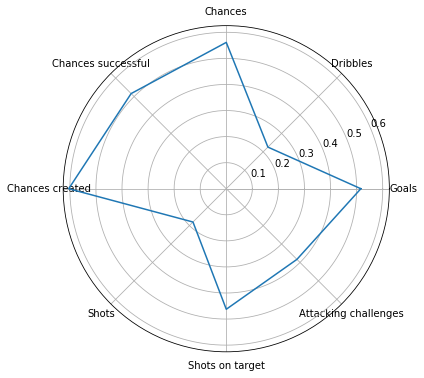

In [71]:
radar_chart ('Alexia Putellas')

In [117]:
radar_chart ('Angela Sosa Martin')

NameError: name 'radar_chart' is not defined

In [49]:
radar_chart ('Jenifer Hermoso')

NameError: name 'radar_chart' is not defined

In [137]:
posicion ('Ane Campos')

'Forward'

In [138]:
partidos_jugados ('Ane Campos')

11